In [3]:
# Imported Packages

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import pickle

In [40]:
data= pd.read_excel("ALF_Data.xlsx")
data

Age Gender Region  Weight  Height  Body Mass Index  Obesity  Waist  \
0      65      M   east    56.0   162.1            21.31      0.0   83.6   
1      36      M  south    60.2   162.2            22.88      0.0   76.6   
2      66      M   east    83.9   162.5            31.77      1.0  113.2   
3      54      M   east    69.4   160.5            26.94      0.0   77.9   
4      63      M  north    73.1   159.2            28.84      0.0   89.3   
...   ...    ...    ...     ...     ...              ...      ...    ...   
8780   35      F   east    70.0   171.5            23.80      0.0   87.5   
8781   66      F  north   102.0   180.7            31.24      1.0  113.2   
8782   37      F  south    84.4   186.0            24.40      0.0   93.6   
8783   39      F   east    92.1   184.8            26.97      0.0   98.2   
8784   70      M   east    58.5   161.1            22.54      0.0   99.4   

      Maximum Blood Pressure  Minimum Blood Pressure  ...  PoorVision  \
0                      135.0                    71.0  ...         0.0   
1                       96.0                    52.0  ...         0.0   
2                      115.0                    57.0  ...         0.0   
3                      110.0                    57.0  ...         0.0   
4                      132.0                    73.0  ...         0.0   
...                      ...                     ...  ...         ...   
8780                   114.0                    76.0  ...         0.0   
8781                   117.0                    72.0  ...         0.0   
8782                   144.0                    82.0  ...         0.0   
8783                   121.0                    75.0  ...         0.0   
8784                   125.0                    82.0  ...         NaN   

      Alcohol Consumption  HyperTension  Family  HyperTension  Diabetes  \
0                       1           0.0                     0       0.0   
1                       0           0.0                     0       0.0   
2                       1           0.0                     0       1.0   
3                       1           0.0                     0       0.0   
4                       0           1.0                     0       0.0   
...                   ...           ...                   ...       ...   
8780                    1           0.0                     1       0.0   
8781                    0           1.0                     0       0.0   
8782                    0           1.0                     0       0.0   
8783                    0           0.0                     0       0.0   
8784                    0           1.0                     1       0.0   

      Family Diabetes  Hepatitis  Family Hepatitis  Chronic Fatigue  ALF  
0                   1        1.0               0.0              0.0  0.0  
1                   0        0.0               0.0              0.0  0.0  
2                   0        0.0               0.0              0.0  0.0  
3                   0        0.0               0.0              0.0  0.0  
4                   0        0.0               0.0              0.0  0.0  
...               ...        ...               ...              ...  ...  
8780                1        0.0               0.0              0.0  NaN  
8781                1        0.0               0.0              0.0  NaN  
8782                0        0.0               0.0              0.0  NaN  
8783                0        0.0               0.0              0.0  NaN  
8784                0        0.0               0.0              0.0  NaN  

[8785 rows x 30 columns]

In [41]:
def numeric_to_categorical(columns,df):
    for col_name in columns:
        df[col_name] = df[col_name].astype('category')
    return df

In [42]:
data.dropna()

Age Gender Region  Weight  Height  Body Mass Index  Obesity  Waist  \
0      65      M   east    56.0   162.1            21.31      0.0   83.6   
2      66      M   east    83.9   162.5            31.77      1.0  113.2   
3      54      M   east    69.4   160.5            26.94      0.0   77.9   
5      26      F   east   119.3   193.2            31.96      1.0  117.9   
6      66      F  north    85.1   172.1            28.73      0.0   99.2   
...   ...    ...    ...     ...     ...              ...      ...    ...   
5995   77      F   east   109.3   185.8            31.66      1.0  117.2   
5996   49      F   east    86.6   168.9            30.36      1.0   99.5   
5997   30      F  north    78.0   174.9            25.50      0.0   89.2   
5998   75      F  north    78.8   176.5            25.30      0.0  100.4   
5999   35      M   east    62.3   164.2            23.11      0.0   87.2   

      Maximum Blood Pressure  Minimum Blood Pressure  ...  PoorVision  \
0                      135.0                    71.0  ...         0.0   
2                      115.0                    57.0  ...         0.0   
3                      110.0                    57.0  ...         0.0   
5                      129.0                    70.0  ...         0.0   
6                      137.0                    92.0  ...         0.0   
...                      ...                     ...  ...         ...   
5995                   149.0                    77.0  ...         0.0   
5996                   130.0                    75.0  ...         0.0   
5997                   126.0                    83.0  ...         0.0   
5998                   129.0                    50.0  ...         0.0   
5999                    95.0                    59.0  ...         0.0   

      Alcohol Consumption  HyperTension  Family  HyperTension  Diabetes  \
0                       1           0.0                     0       0.0   
2                       1           0.0                     0       1.0   
3                       1           0.0                     0       0.0   
5                       0           0.0                     1       0.0   
6                       0           1.0                     0       0.0   
...                   ...           ...                   ...       ...   
5995                    1           1.0                     0       0.0   
5996                    0           1.0                     1       0.0   
5997                    0           0.0                     1       0.0   
5998                    1           1.0                     0       1.0   
5999                    1           0.0                     0       0.0   

      Family Diabetes  Hepatitis  Family Hepatitis  Chronic Fatigue  ALF  
0                   1        1.0               0.0              0.0  0.0  
2                   0        0.0               0.0              0.0  0.0  
3                   0        0.0               0.0              0.0  0.0  
5                   0        0.0               0.0              0.0  0.0  
6                   0        0.0               0.0              0.0  0.0  
...               ...        ...               ...              ...  ...  
5995                0        0.0               0.0              0.0  1.0  
5996                0        0.0               0.0              0.0  0.0  
5997                1        0.0               0.0              0.0  0.0  
5998                1        0.0               0.0              0.0  0.0  
5999                0        0.0               0.0              0.0  0.0  

[4322 rows x 30 columns]

In [43]:
data=data.drop(['Weight','Height','Source of Care','Unmarried'],axis=1)

In [44]:
numeric_to_categorical(['Gender',
                        'Obesity',
                        'Region',
                        'Dyslipidemia',
                        'PVD',
                        'Education',
                        'Income',
                        'Physical Activity',
                        'PoorVision',
                        'Alcohol Consumption',
                        'HyperTension',
                        'Family  HyperTension',
                        'Diabetes',
                        'Hepatitis',
                        'Family Hepatitis',
                        'Chronic Fatigue',
                        'ALF'],
                       data
                      )

Age Gender Region  Body Mass Index Obesity  Waist  \
0      65      M   east            21.31     0.0   83.6   
1      36      M  south            22.88     0.0   76.6   
2      66      M   east            31.77     1.0  113.2   
3      54      M   east            26.94     0.0   77.9   
4      63      M  north            28.84     0.0   89.3   
...   ...    ...    ...              ...     ...    ...   
8780   35      F   east            23.80     0.0   87.5   
8781   66      F  north            31.24     1.0  113.2   
8782   37      F  south            24.40     0.0   93.6   
8783   39      F   east            26.97     0.0   98.2   
8784   70      M   east            22.54     0.0   99.4   

      Maximum Blood Pressure  Minimum Blood Pressure  Good Cholesterol  \
0                      135.0                    71.0              48.0   
1                       96.0                    52.0              31.0   
2                      115.0                    57.0              44.0   
3                      110.0                    57.0              74.0   
4                      132.0                    73.0              67.0   
...                      ...                     ...               ...   
8780                   114.0                    76.0              64.0   
8781                   117.0                    72.0              48.0   
8782                   144.0                    82.0              48.0   
8783                   121.0                    75.0              51.0   
8784                   125.0                    82.0              89.0   

      Bad Cholesterol  ...  PoorVision Alcohol Consumption HyperTension  \
0               249.0  ...         0.0                   1          0.0   
1               135.0  ...         0.0                   0          0.0   
2               211.0  ...         0.0                   1          0.0   
3               156.0  ...         0.0                   1          0.0   
4               154.0  ...         0.0                   0          1.0   
...               ...  ...         ...                 ...          ...   
8780            136.0  ...         0.0                   1          0.0   
8781            170.0  ...         0.0                   0          1.0   
8782            149.0  ...         0.0                   0          1.0   
8783            117.0  ...         0.0                   0          0.0   
8784            123.0  ...         NaN                   0          1.0   

     Family  HyperTension Diabetes Family Diabetes Hepatitis Family Hepatitis  \
0                       0      0.0               1       1.0              0.0   
1                       0      0.0               0       0.0              0.0   
2                       0      1.0               0       0.0              0.0   
3                       0      0.0               0       0.0              0.0   
4                       0      0.0               0       0.0              0.0   
...                   ...      ...             ...       ...              ...   
8780                    1      0.0               1       0.0              0.0   
8781                    0      0.0               1       0.0              0.0   
8782                    0      0.0               0       0.0              0.0   
8783                    0      0.0               0       0.0              0.0   
8784                    1      0.0               0       0.0              0.0   

     Chronic Fatigue  ALF  
0                0.0  0.0  
1                0.0  0.0  
2                0.0  0.0  
3                0.0  0.0  
4                0.0  0.0  
...              ...  ...  
8780             0.0  NaN  
8781             0.0  NaN  
8782             0.0  NaN  
8783             0.0  NaN  
8784             0.0  NaN  

[8785 rows x 26 columns]

In [45]:
data=data.drop(['Body Mass Index','Physical Activity'],axis=1)

In [46]:
numeric_to_categorical(['Family Diabetes'],
                       data
                      )

Age Gender Region Obesity  Waist  Maximum Blood Pressure  \
0      65      M   east     0.0   83.6                   135.0   
1      36      M  south     0.0   76.6                    96.0   
2      66      M   east     1.0  113.2                   115.0   
3      54      M   east     0.0   77.9                   110.0   
4      63      M  north     0.0   89.3                   132.0   
...   ...    ...    ...     ...    ...                     ...   
8780   35      F   east     0.0   87.5                   114.0   
8781   66      F  north     1.0  113.2                   117.0   
8782   37      F  south     0.0   93.6                   144.0   
8783   39      F   east     0.0   98.2                   121.0   
8784   70      M   east     0.0   99.4                   125.0   

      Minimum Blood Pressure  Good Cholesterol  Bad Cholesterol  \
0                       71.0              48.0            249.0   
1                       52.0              31.0            135.0   
2                       57.0              44.0            211.0   
3                       57.0              74.0            156.0   
4                       73.0              67.0            154.0   
...                      ...               ...              ...   
8780                    76.0              64.0            136.0   
8781                    72.0              48.0            170.0   
8782                    82.0              48.0            149.0   
8783                    75.0              51.0            117.0   
8784                    82.0              89.0            123.0   

      Total Cholesterol  ... PoorVision Alcohol Consumption HyperTension  \
0                 297.0  ...        0.0                   1          0.0   
1                 166.0  ...        0.0                   0          0.0   
2                 255.0  ...        0.0                   1          0.0   
3                 230.0  ...        0.0                   1          0.0   
4                 221.0  ...        0.0                   0          1.0   
...                 ...  ...        ...                 ...          ...   
8780              200.0  ...        0.0                   1          0.0   
8781              218.0  ...        0.0                   0          1.0   
8782              197.0  ...        0.0                   0          1.0   
8783              168.0  ...        0.0                   0          0.0   
8784              212.0  ...        NaN                   0          1.0   

     Family  HyperTension Diabetes Family Diabetes Hepatitis Family Hepatitis  \
0                       0      0.0               1       1.0              0.0   
1                       0      0.0               0       0.0              0.0   
2                       0      1.0               0       0.0              0.0   
3                       0      0.0               0       0.0              0.0   
4                       0      0.0               0       0.0              0.0   
...                   ...      ...             ...       ...              ...   
8780                    1      0.0               1       0.0              0.0   
8781                    0      0.0               1       0.0              0.0   
8782                    0      0.0               0       0.0              0.0   
8783                    0      0.0               0       0.0              0.0   
8784                    1      0.0               0       0.0              0.0   

     Chronic Fatigue  ALF  
0                0.0  0.0  
1                0.0  0.0  
2                0.0  0.0  
3                0.0  0.0  
4                0.0  0.0  
...              ...  ...  
8780             0.0  NaN  
8781             0.0  NaN  
8782             0.0  NaN  
8783             0.0  NaN  
8784             0.0  NaN  

[8785 rows x 24 columns]

In [47]:
data=data.drop(['Education'],axis=1)

In [48]:
data.dropna()

Age Gender Region Obesity  Waist  Maximum Blood Pressure  \
0      65      M   east     0.0   83.6                   135.0   
1      36      M  south     0.0   76.6                    96.0   
2      66      M   east     1.0  113.2                   115.0   
3      54      M   east     0.0   77.9                   110.0   
5      26      F   east     1.0  117.9                   129.0   
...   ...    ...    ...     ...    ...                     ...   
5995   77      F   east     1.0  117.2                   149.0   
5996   49      F   east     1.0   99.5                   130.0   
5997   30      F  north     0.0   89.2                   126.0   
5998   75      F  north     0.0  100.4                   129.0   
5999   35      M   east     0.0   87.2                    95.0   

      Minimum Blood Pressure  Good Cholesterol  Bad Cholesterol  \
0                       71.0              48.0            249.0   
1                       52.0              31.0            135.0   
2                       57.0              44.0            211.0   
3                       57.0              74.0            156.0   
5                       70.0              43.0            159.0   
...                      ...               ...              ...   
5995                    77.0              33.0            189.0   
5996                    75.0              38.0            123.0   
5997                    83.0              40.0            131.0   
5998                    50.0              58.0            134.0   
5999                    59.0              52.0            102.0   

      Total Cholesterol  ... PoorVision Alcohol Consumption HyperTension  \
0                 297.0  ...        0.0                   1          0.0   
1                 166.0  ...        0.0                   0          0.0   
2                 255.0  ...        0.0                   1          0.0   
3                 230.0  ...        0.0                   1          0.0   
5                 202.0  ...        0.0                   0          0.0   
...                 ...  ...        ...                 ...          ...   
5995              222.0  ...        0.0                   1          1.0   
5996              161.0  ...        0.0                   0          1.0   
5997              171.0  ...        0.0                   0          0.0   
5998              192.0  ...        0.0                   1          1.0   
5999              154.0  ...        0.0                   1          0.0   

     Family  HyperTension Diabetes Family Diabetes Hepatitis Family Hepatitis  \
0                       0      0.0               1       1.0              0.0   
1                       0      0.0               0       0.0              0.0   
2                       0      1.0               0       0.0              0.0   
3                       0      0.0               0       0.0              0.0   
5                       1      0.0               0       0.0              0.0   
...                   ...      ...             ...       ...              ...   
5995                    0      0.0               0       0.0              0.0   
5996                    1      0.0               0       0.0              0.0   
5997                    1      0.0               1       0.0              0.0   
5998                    0      1.0               1       0.0              0.0   
5999                    0      0.0               0       0.0              0.0   

     Chronic Fatigue  ALF  
0                0.0  0.0  
1                0.0  0.0  
2                0.0  0.0  
3                0.0  0.0  
5                0.0  0.0  
...              ...  ...  
5995             0.0  1.0  
5996             0.0  0.0  
5997             0.0  0.0  
5998             0.0  0.0  
5999             0.0  0.0  

[4565 rows x 23 columns]

In [49]:
data=data.dropna()

In [50]:
cols=[]

for i in data.columns:
    if str(data[i].dtypes)=="category":
        cols.append(i)

In [51]:
X=pd.get_dummies(data, columns=cols[0:len(cols)-1])

In [52]:
y=data['ALF']

In [53]:
X=X.drop('ALF',axis=1)

In [54]:
X.dtypes

Age                         int64
Waist                     float64
Maximum Blood Pressure    float64
Minimum Blood Pressure    float64
Good Cholesterol          float64
Bad Cholesterol           float64
Total Cholesterol         float64
Gender_F                    uint8
Gender_M                    uint8
Region_east                 uint8
Region_north                uint8
Region_south                uint8
Region_west                 uint8
Obesity_0.0                 uint8
Obesity_1.0                 uint8
Dyslipidemia_0              uint8
Dyslipidemia_1              uint8
PVD_0                       uint8
PVD_1                       uint8
Income_0.0                  uint8
Income_1.0                  uint8
PoorVision_0.0              uint8
PoorVision_1.0              uint8
Alcohol Consumption_0       uint8
Alcohol Consumption_1       uint8
HyperTension_0.0            uint8
HyperTension_1.0            uint8
Family  HyperTension_0      uint8
Family  HyperTension_1      uint8
Diabetes_0.0  

In [56]:
X

Age  Waist  Maximum Blood Pressure  Minimum Blood Pressure  \
0      65   83.6                   135.0                    71.0   
1      36   76.6                    96.0                    52.0   
2      66  113.2                   115.0                    57.0   
3      54   77.9                   110.0                    57.0   
5      26  117.9                   129.0                    70.0   
...   ...    ...                     ...                     ...   
5995   77  117.2                   149.0                    77.0   
5996   49   99.5                   130.0                    75.0   
5997   30   89.2                   126.0                    83.0   
5998   75  100.4                   129.0                    50.0   
5999   35   87.2                    95.0                    59.0   

      Good Cholesterol  Bad Cholesterol  Total Cholesterol  Gender_F  \
0                 48.0            249.0              297.0         0   
1                 31.0            135.0              166.0         0   
2                 44.0            211.0              255.0         0   
3                 74.0            156.0              230.0         0   
5                 43.0            159.0              202.0         1   
...                ...              ...                ...       ...   
5995              33.0            189.0              222.0         1   
5996              38.0            123.0              161.0         1   
5997              40.0            131.0              171.0         1   
5998              58.0            134.0              192.0         1   
5999              52.0            102.0              154.0         0   

      Gender_M  Region_east  ...  Diabetes_0.0  Diabetes_1.0  \
0            1            1  ...             1             0   
1            1            0  ...             1             0   
2            1            1  ...             0             1   
3            1            1  ...             1             0   
5            0            1  ...             1             0   
...        ...          ...  ...           ...           ...   
5995         0            1  ...             1             0   
5996         0            1  ...             1             0   
5997         0            0  ...             1             0   
5998         0            0  ...             0             1   
5999         1            1  ...             1             0   

      Family Diabetes_0  Family Diabetes_1  Hepatitis_0.0  Hepatitis_1.0  \
0                     0                  1              0              1   
1                     1                  0              1              0   
2                     1                  0              1              0   
3                     1                  0              1              0   
5                     1                  0              1              0   
...                 ...                ...            ...            ...   
5995                  1                  0              1              0   
5996                  1                  0              1              0   
5997                  0                  1              1              0   
5998                  0                  1              1              0   
5999                  1                  0              1              0   

      Family Hepatitis_0.0  Family Hepatitis_1.0  Chronic Fatigue_0.0  \
0                        1                     0                    1   
1                        1                     0                    1   
2                        1                     0                    1   
3                        1                     0                    1   
5                        1                     0                    1   
...                    ...                   ...                  ...   
5995                     1                     0                    1   
5996                     1                     0          

In [55]:
model=RandomForestClassifier(n_estimators=301)
model.fit(X,y)
pickle.dump(model,open('ALF_model.pkl','wb'))

In [14]:
X_one_hot=X_one_hot.dropna()


In [36]:
X=X.drop('Unmarried_1.0',axis=1)

In [38]:
X.columns

Index(['Age', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Gender_F',
       'Gender_M', 'Region_east', 'Region_north', 'Region_south',
       'Region_west', 'Obesity_0.0', 'Obesity_1.0', 'Dyslipidemia_0',
       'Dyslipidemia_1', 'PVD_0', 'PVD_1', 'Physical Activity_1.0',
       'Physical Activity_2.0', 'Physical Activity_3.0',
       'Physical Activity_4.0', 'Unmarried_0.0', 'Income_0.0', 'Income_1.0',
       'PoorVision_0.0', 'PoorVision_1.0', 'Alcohol Consumption_0',
       'Alcohol Consumption_1', 'HyperTension_0.0', 'HyperTension_1.0',
       'Family  HyperTension_0', 'Family  HyperTension_1', 'Diabetes_0.0',
       'Diabetes_1.0', 'Family Diabetes_0', 'Family Diabetes_1',
       'Hepatitis_0.0', 'Hepatitis_1.0', 'Family Hepatitis_0.0',
       'Family Hepatitis_1.0', 'Chronic Fatigue_0.0', 'Chronic Fatigue_1.0'],
      dtype='object')

In [18]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_one_hot)

fig = px.scatter(components, x=0, y=1, color=y_one_hot)
fig.show()

In [19]:
pca = PCA(n_components=3)
components = pca.fit_transform(X_one_hot)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_one_hot,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [20]:
kf=KFold(n_splits=15)
randomForest_scores=[]
svc_scores=[]
KNN_scores=[]
logistic_regression_scores=[]
multinomialNB_scores=[]
randomForest_cm=[]

In [26]:
X=X_one_hot

In [24]:
y=y_one_hot

In [27]:
for j in range(10):
    scores=[]
    for train,test in kf.split(X,y):
        X_train,X_test,y_train,y_test=X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]

        model=LogisticRegression()
        model.fit(X_train,y_train)
        scores.append(metrics.accuracy_score(y_test, model.predict(X_test)))

    logistic_regression_scores.append(sum(scores)/len(scores))

clear_output(wait=True)    
print("Logistic Regresion Mean Test Score: {}".format(np.mean(logistic_regression_scores)))

Logistic Regresion Mean Test Score: 0.9274083042655212


In [28]:
for j in range(10):
    scores=[]
    for train,test in kf.split(X,y):
        X_train,X_test,y_train,y_test=X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]

        model=RandomForestClassifier(n_estimators=301)
        model.fit(X_train,y_train)
        scores.append(metrics.accuracy_score(y_test, model.predict(X_test)))
        randomForest_cm.append(metrics.confusion_matrix(y_test, model.predict(X_test)))
    randomForest_scores.append(sum(scores)/len(scores))

clear_output(wait=True)    
print("Random Forest Mean Test Score: {}".format(np.mean(randomForest_scores)))

Random Forest Mean Test Score: 0.9289800320947081


In [29]:
def heatmap(confustion_matrix):

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    confustion_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         confustion_matrix.flatten()/np.sum(confustion_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(confustion_matrix, annot=labels, fmt='', cmap='Blues')

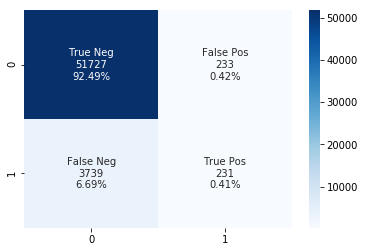

In [30]:
heatmap(sum(randomForest_cm))

In [31]:
model=RandomForestClassifier(n_estimators=301)
model.fit(X,y)
pickle.dump(model,open('liverfailure_model.pkl','wb'))